In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

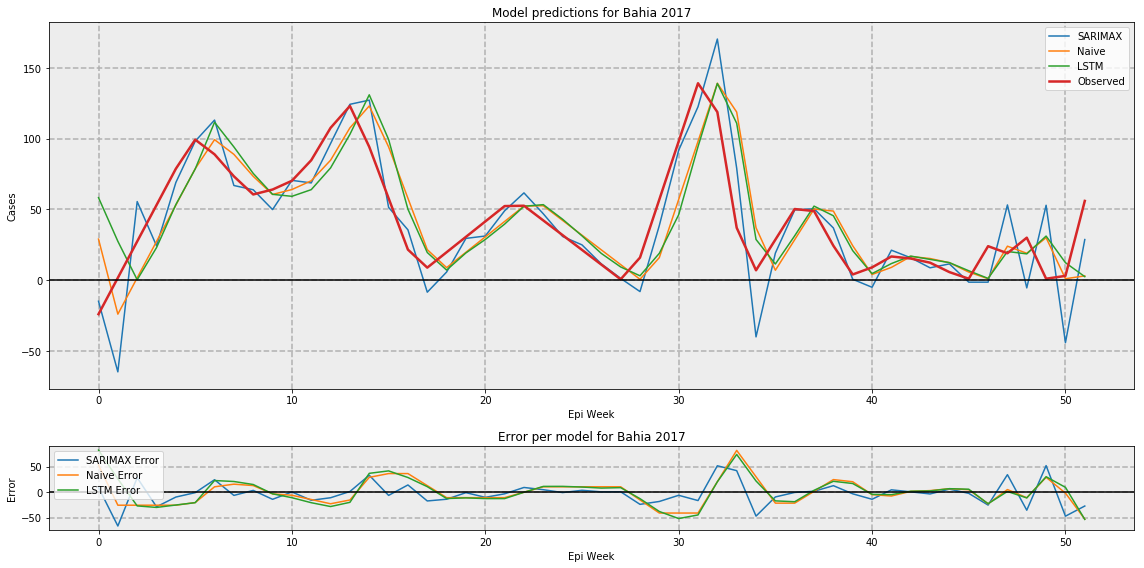

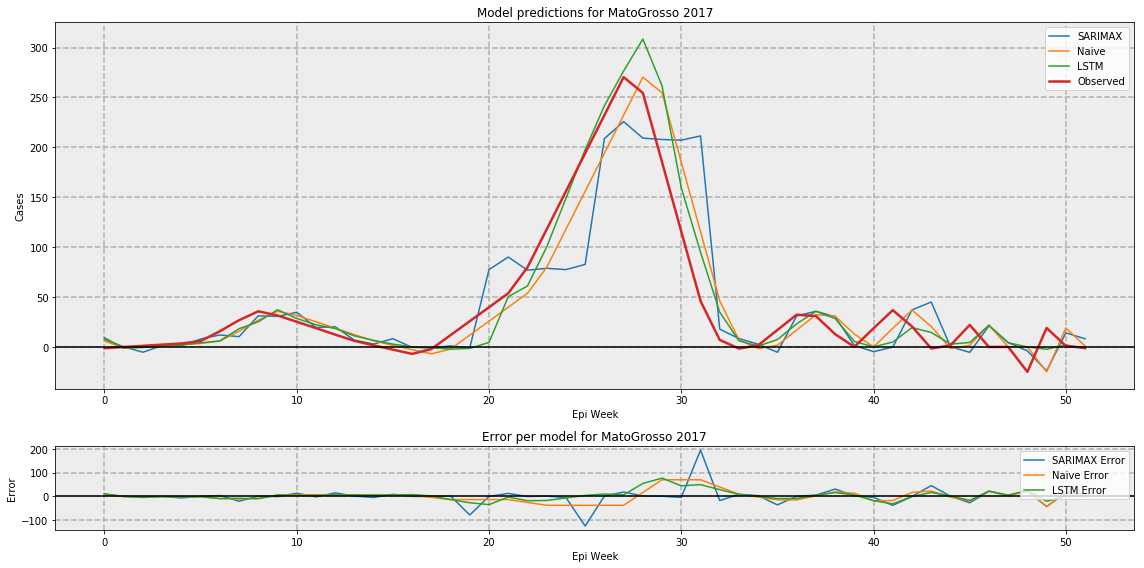

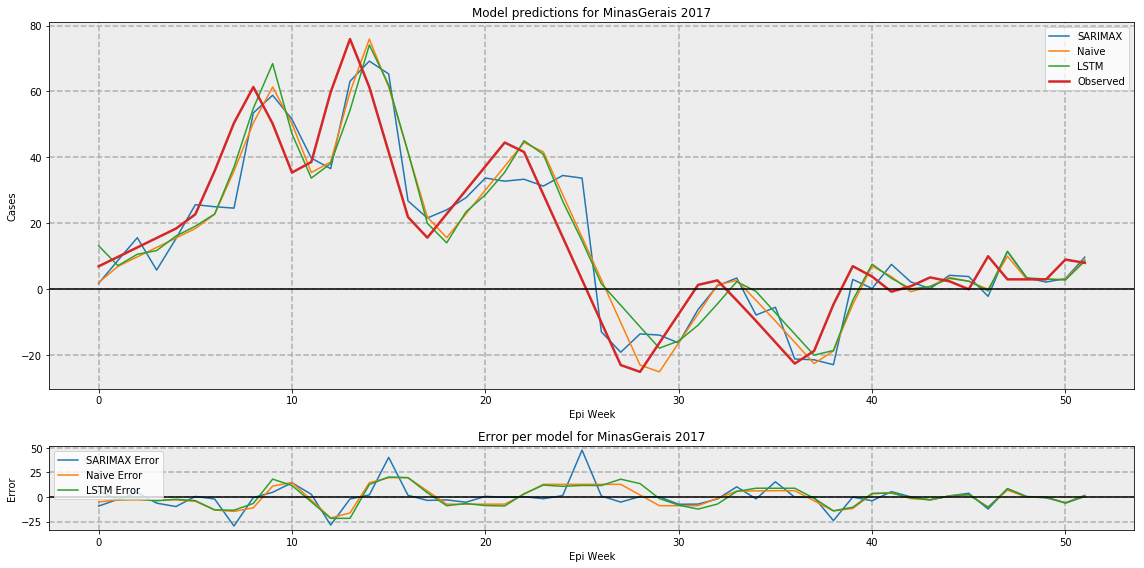

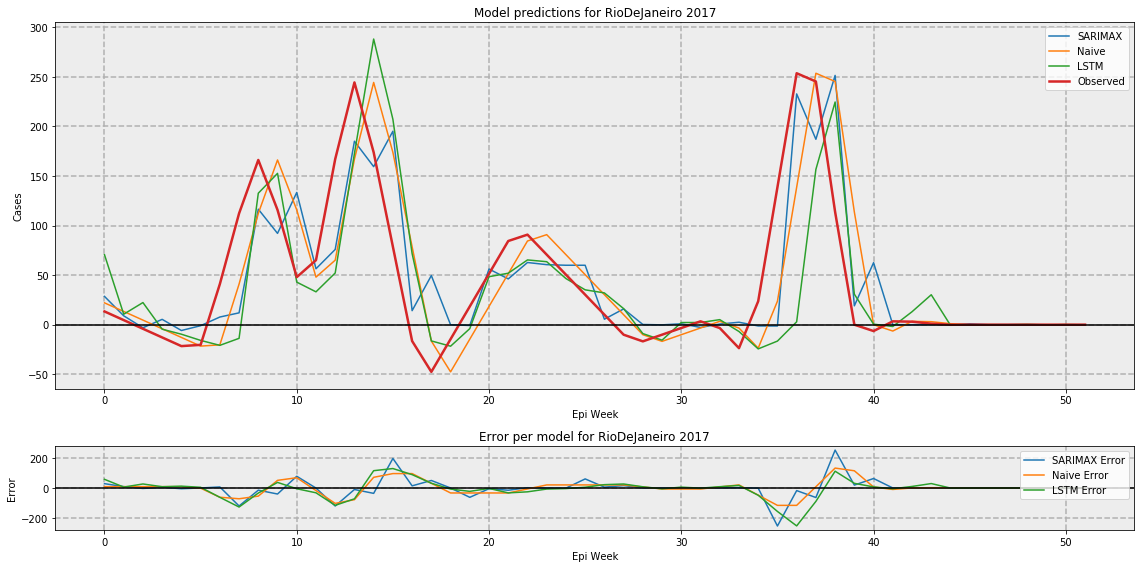

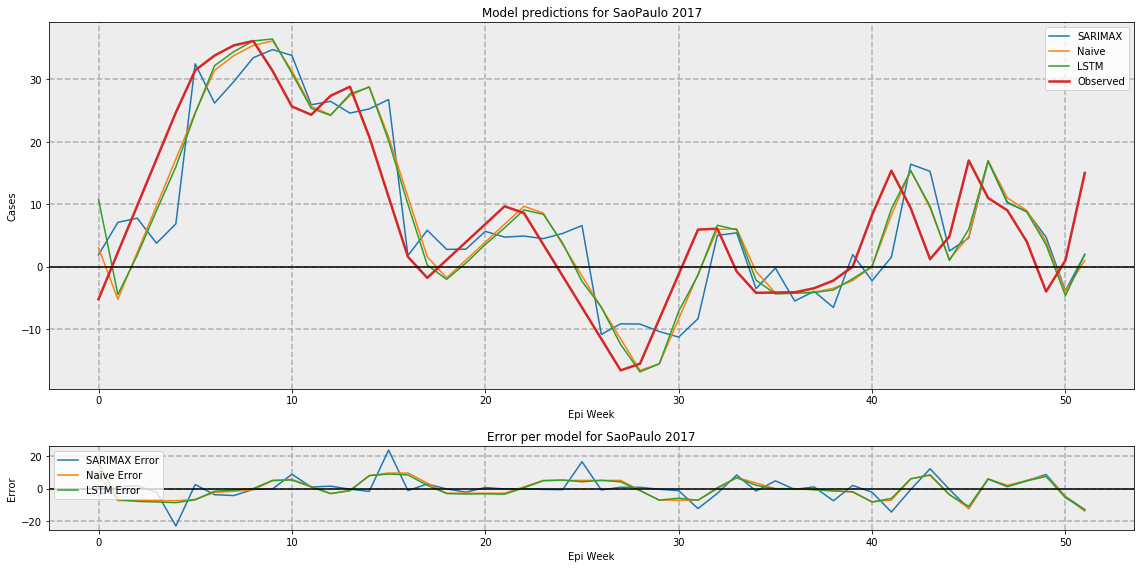

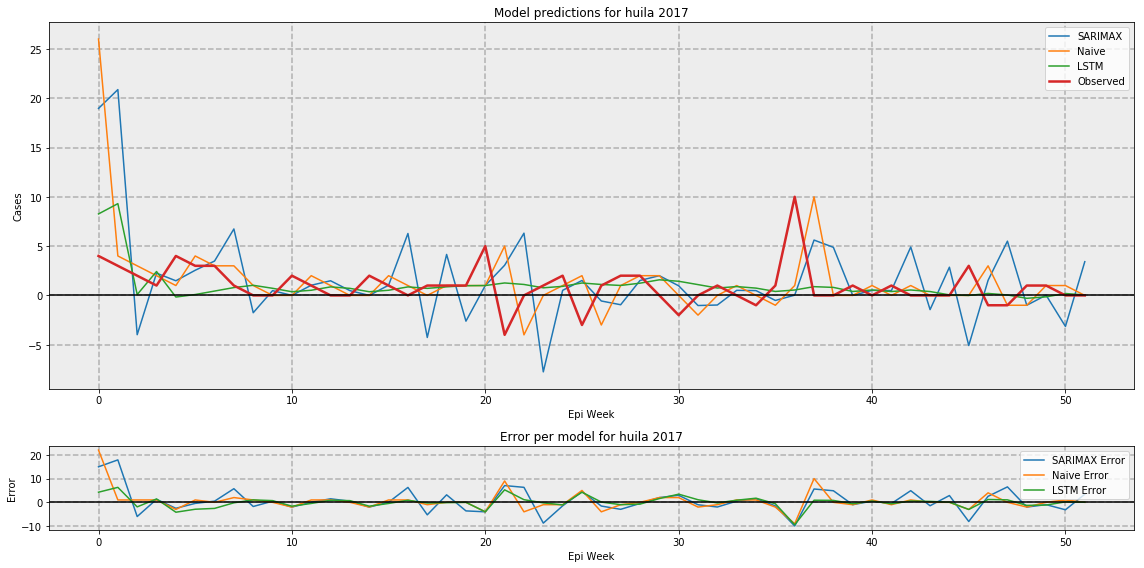

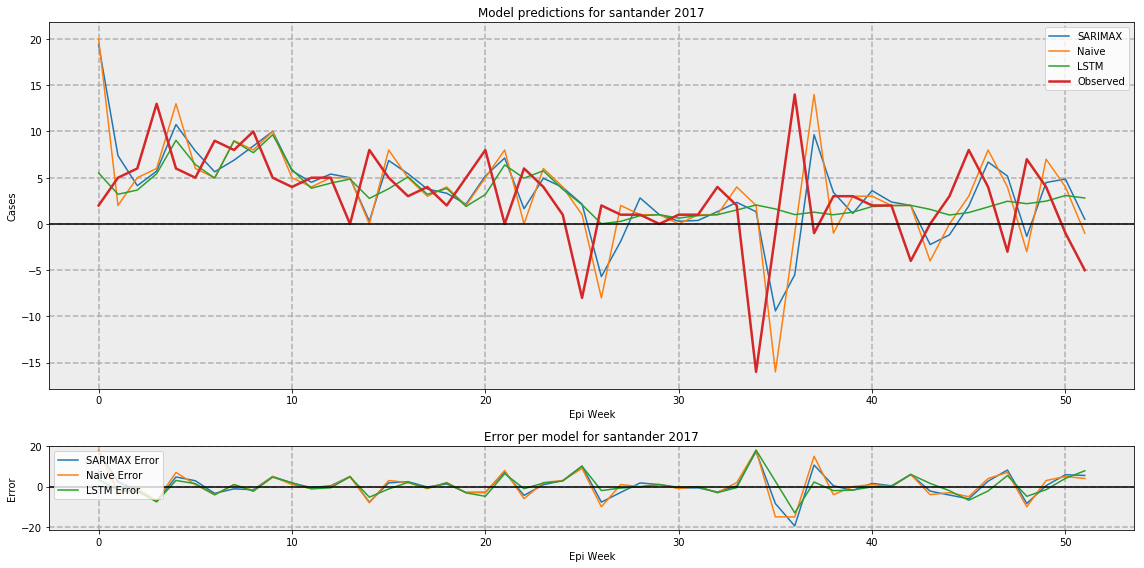

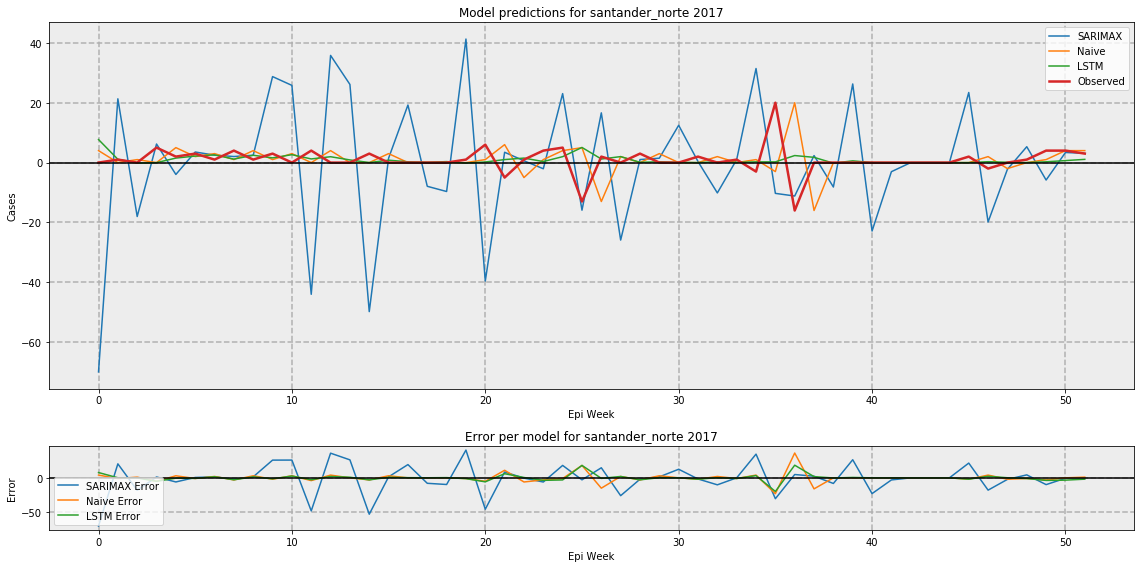

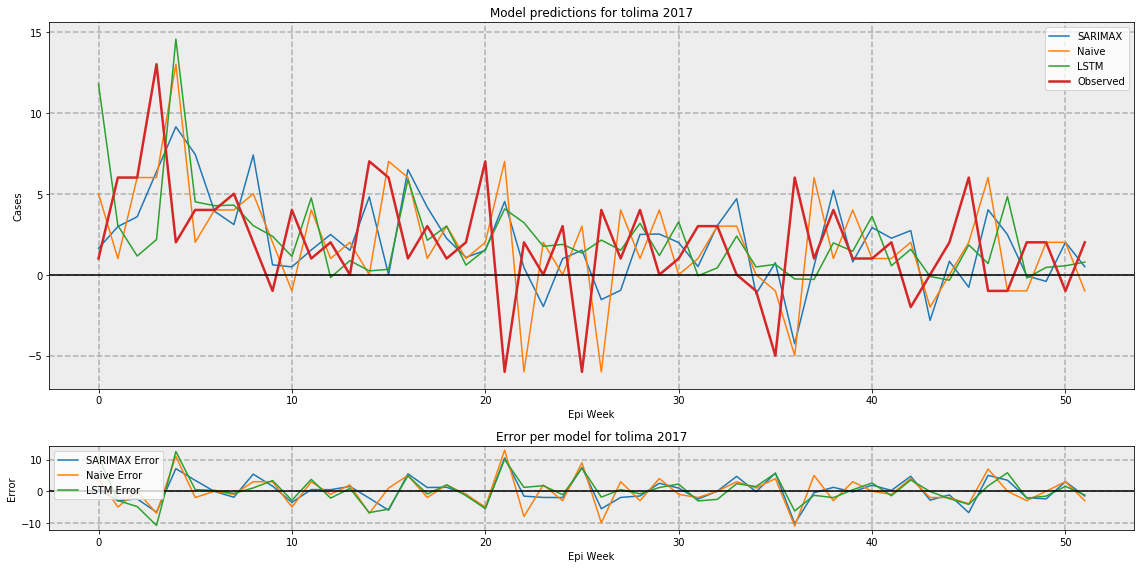

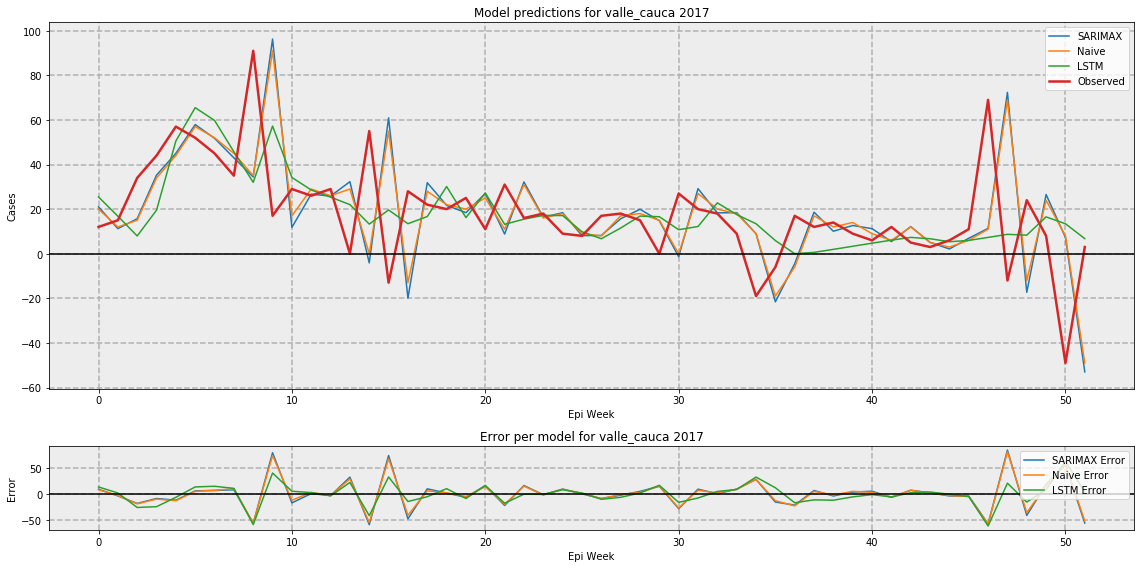

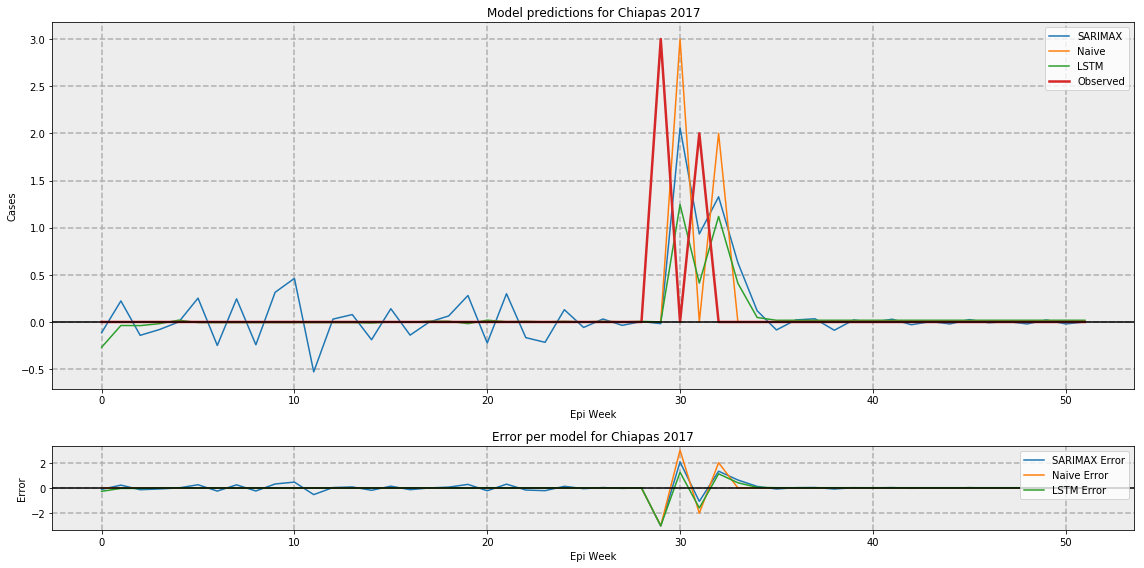

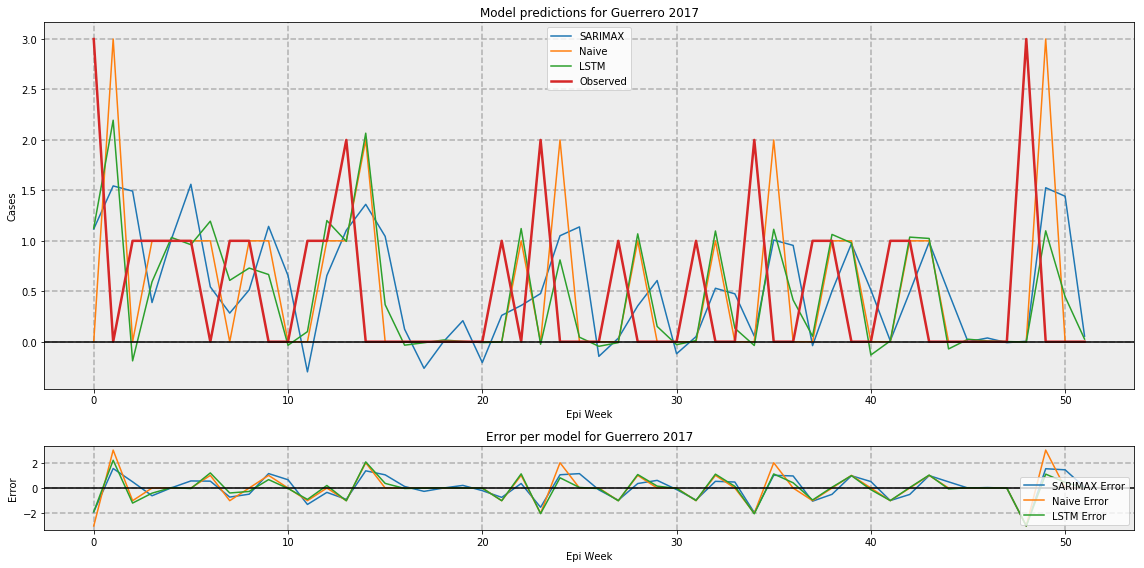

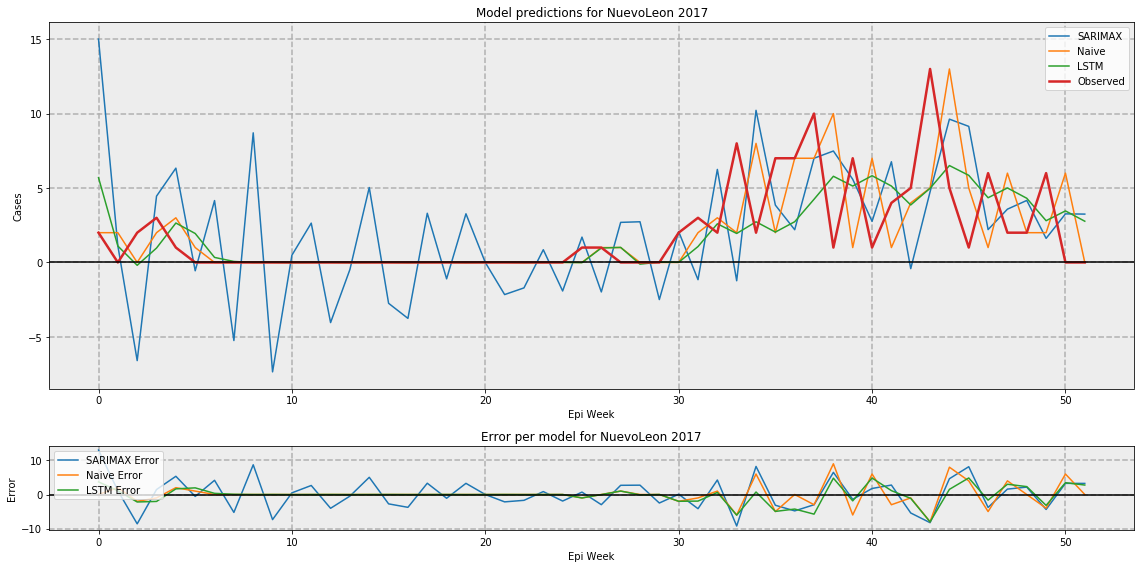

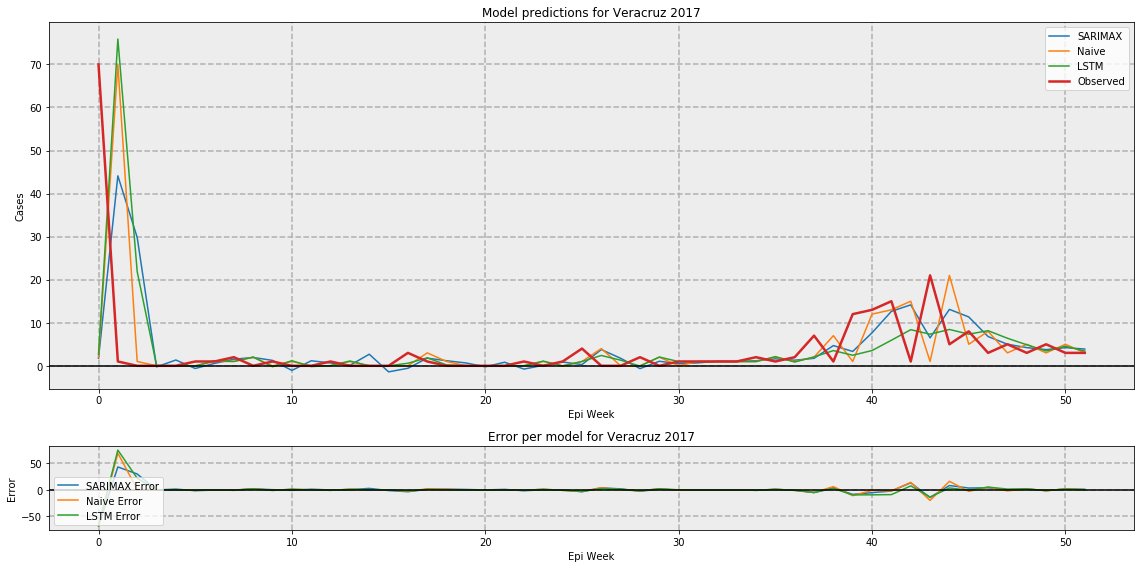

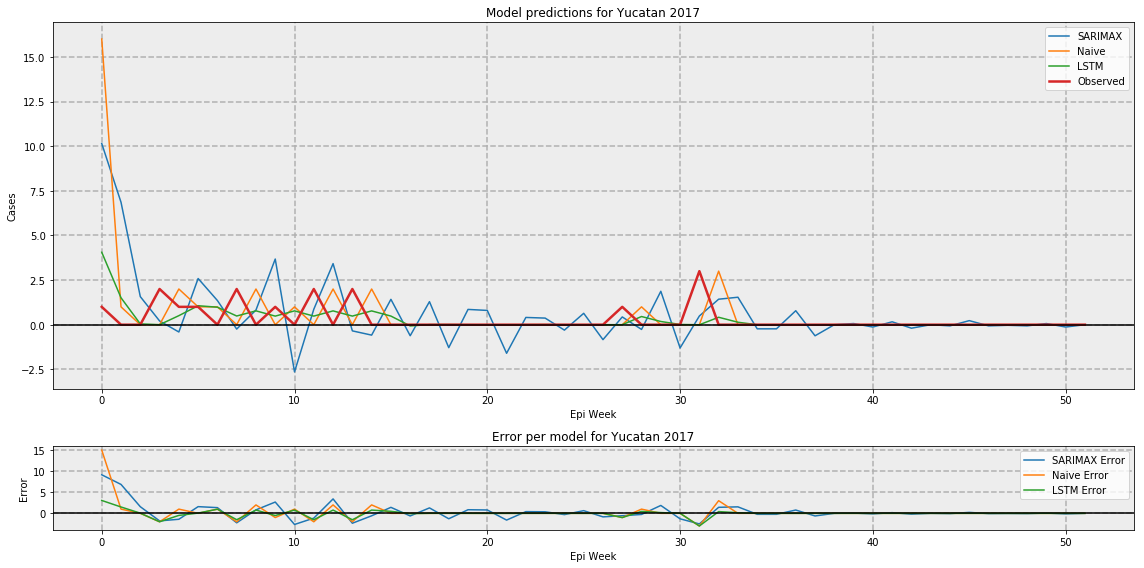

In [3]:
for country in ["Brazil", "Colombia", "Mexico"]:
    
    #Arimax
    ArimaxFolder = "../Models/Arimax-State"
    arimaxPredictions = {}
    arimaxErrors = {}
    
    for state in os.listdir("{}/{}".format(ArimaxFolder, country)):
        dataset = pd.read_csv("{0}/{1}/{2}/Arimax-{2}".format(ArimaxFolder, country, state))
        arimaxPredictions[state] = dataset["Predicted Cases"].values
        arimaxErrors[state] = dataset["error"].values
        
    #Prophet
    prophetPredictions = {}
    prophetErrors = {}
    ProphetFolder = "../Models/Prophet"
    
    for state in os.listdir("{}/{}".format(ProphetFolder, country)):
        dataset = pd.read_csv("{0}/{1}/{2}/Prophet-{2}".format(ProphetFolder, country, state))
        prophetPredictions[state] = dataset["Predicted"].values
        prophetErrors[state] = dataset["error"].values
        
    #LSTM
    lstmPredictions = {}
    LSTMFolder = "../Models/LSTM_yearly"
    lstmErrors = {}
    observed = {}
    for state in os.listdir("{}/{}".format(LSTMFolder, country)):
        dataset = pd.read_csv("{0}/{1}/{2}/{2}".format(LSTMFolder, country, state))
        lstmPredictions[state] = dataset["Predicted"].values
        lstmErrors[state] = dataset["error"].values
        observed[state] = dataset["Observed"].values
    #Naive
    naivePrediction = {}
    NaiveFolder = "../Models/Naive"
    naivePredictions = {}
    naiveErrors = {}
    for state in os.listdir("{}/{}".format(NaiveFolder, country)):
        dataset = pd.read_csv("{0}/{1}/{2}/Naive-{2}".format(NaiveFolder, country, state))
        naivePredictions[state] = dataset["Predicted"].values
        naiveErrors[state] = dataset["error"].values
    #

        
    for state in arimaxPredictions:
        outDataset = pd.DataFrame()
        outDataset.insert(0, "SARIMAX", arimaxPredictions[state])
        outDataset.insert(1, "LSTM", lstmPredictions[state])
        outDataset.insert(2, "Naive", naivePredictions[state])
        outDataset.insert(3, "Observed", observed[state])
        
        fig = plt.figure(figsize=(16,8))
        ax1 = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
#         ax1 = fig.add_subplot(211)
        
        outDataset[["SARIMAX", "Naive", "LSTM"]].plot(ax=ax1, legend=True)
        outDataset[["Observed"]].plot(ax=ax1, legend=True, lw=2.5)
        plt.title("Model predictions for {} 2017".format(state.replace("_2016-2017.csv", "")))
        plt.xlabel("Epi Week")
        plt.ylabel("Cases")
        
        ax1.set_facecolor((0.9, 0.9, 0.9, 0.7))
        plt.axhline(linewidth=1.5, color='black')
        plt.grid(linestyle='dashed', linewidth=1.5)
        
        ax2 = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)
        errorDataset = pd.DataFrame()
        errorDataset.insert(0, "SARIMAX Error", arimaxErrors[state])
        errorDataset.insert(1, "LSTM Error", lstmErrors[state])
        errorDataset.insert(2, "Naive Error", naiveErrors[state])
        
        errorDataset[["SARIMAX Error", "Naive Error", "LSTM Error"]].plot(ax=ax2, legend=True)
        plt.title("Error per model for {} 2017".format(state.replace("_2016-2017.csv", "")))
        plt.xlabel("Epi Week")
        plt.ylabel("Error")
        plt.axhline(linewidth=1.5, color='black')
        ax2.set_facecolor((0.9, 0.9, 0.9, 0.7))
        ax2.grid(linestyle='dashed', linewidth=1.5)
        
#         plt.subplots_adjust(left=None, right=None, top=None,
#         wspace=None, hspace=2)
        plt.tight_layout()
        
        fig.savefig("{}/{}".format(country, state.replace(".csv", "")))
        
        outDataset.to_csv("{}/{}".format(country, state))
        errorDataset.to_csv("{}/Error-{}".format(country, state))
    #Errors 
#     for state in arimaxErrors:
#         outDataset = pd.DataFrame()
#         outDataset.insert(0, "Arimax Error", arimaxErrors[state])
#         outDataset.insert(1, "Prophet Error", prophetErrors[state])
#         outDataset.insert(2, "LSTM Error", lstmErrors[state])
#         outDataset.insert(3, "Naive Error", naiveErrors[state])
        
        
#         outDataset[["Arimax Error", "LSTM Error", "Naive Error"]].plot(figsize=(12,4))
#         plt.title("Error per model for {} 2017".format(state.replace("_2016-2017.csv", "")))
#         plt.xlabel("Epi Week")
#         plt.ylabel("Error")
#         plt.axhline(linewidth=1.5, color='black')
#         ax = plt.gca()
#         ax.set_facecolor((0.9, 0.9, 0.9, 0.7))
#         plt.legend()
#         plt.grid(linestyle='dashed', linewidth=1.5)
#         fig = plt.gcf()
#         fig.savefig("{}/{}-Error".format(country, state.replace(".csv", "")))
        
#         outDataset.to_csv("{}/{}".format(country, state))
        